In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_logs(log_type, logs, ax):
    if log_type == 'error':
        train_log = np.array(logs['train_error'])
        valid_log = np.array(logs['valid_error'])
        test_log = np.array(logs['test_error'])
        ymin = 0.0
        ymax = 3.0
        ax.set_title('error graph, test error: {}'.format(round(test_log[-1],4)))
    elif log_type == 'accuracy':
        train_log = np.array(logs['train_accuracy'])
        valid_log = np.array(logs['valid_accuracy'])
        test_log = np.array(logs['test_accuracy'])
        ymin = 0.0
        ymax = 1.0
        ax.set_title('accruacy graph, test accruacy: {}'.format(round(test_log[-1],4)))
    
    ax.plot(train_log.nonzero()[0], train_log[train_log.nonzero()[0]], label='train')
    ax.plot(valid_log.nonzero()[0], valid_log[valid_log.nonzero()[0]], label='valid')
    ax.scatter(test_log.nonzero()[0], test_log[test_log.nonzero()[0]], s=100, color='red', label='test')
    
    ax.set_ylim([ymin, ymax])
    ax.legend()

def plot_diff_logs(filename1, filename2):
    fig, axes = plt.subplots(1, 2, sharey=False, figsize=(16,8))
    
    file1_logs = pd.read_csv(filename1)
    file1_error_logs = np.array(file1_logs['valid_error'])
    file1_accuracy_logs = np.array(file1_logs['valid_accuracy'])
    
    file2_logs = pd.read_csv(filename2)
    file2_error_logs = np.array(file2_logs['valid_error'])
    file2_accuracy_logs = np.array(file2_logs['valid_accuracy'])
    
    axes[0].plot(file1_error_logs.nonzero()[0], file1_error_logs[file1_error_logs.nonzero()[0]], label="_".join(filename1.split("/")[2].split("_")[1:]))
    axes[0].plot(file2_error_logs.nonzero()[0], file2_error_logs[file2_error_logs.nonzero()[0]], label="_".join(filename2.split("/")[2].split("_")[1:]))
    axes[0].set_ylim([0.0, 3.0])
    axes[0].legend()
    
    axes[1].plot(file1_accuracy_logs.nonzero()[0], file1_accuracy_logs[file1_accuracy_logs.nonzero()[0]], label="_".join(filename1.split("/")[2].split("_")[1:]))
    axes[1].plot(file2_accuracy_logs.nonzero()[0], file2_accuracy_logs[file2_accuracy_logs.nonzero()[0]], label="_".join(filename2.split("/")[2].split("_")[1:]))
    axes[1].set_ylim([0.0, 1.0])
    axes[1].legend()
    
    plt.show()
    plt.close()

In [ ]:
filename = './output/miniimagenet_maml/logs/logs.csv'
logs = pd.read_csv(filename)

fig, axes = plt.subplots(1, 2, sharey=False, figsize=(16, 8))

plot_logs(log_type='error', logs=logs, ax=axes[0])
plot_logs(log_type='accuracy', logs=logs, ax=axes[1])

plt.suptitle(filename.split("/")[2])
plt.show()
plt.close()

['miniimagenet_maml', 'miniimagenet_te_avgpool', 'miniimagenet_te_gcn_manual0.1_l1_concat', 'miniimagenet_te_gcn_manual0.1_l1_concat_fr0.1', 'miniimagenet_te_gcn_manual0.1_l1_concat_gr_b1e-4_g5', 'miniimagenet_te_gcn_maxnorm_l1_concat', 'miniimagenet_te_gcn_unitnorm_l1_concat', 'miniimagenet_te_gcn_unitnorm_l1_concat_zero_init', 'miniimagenet_te_gcn_weightednorm_l1_concat_zero_init']


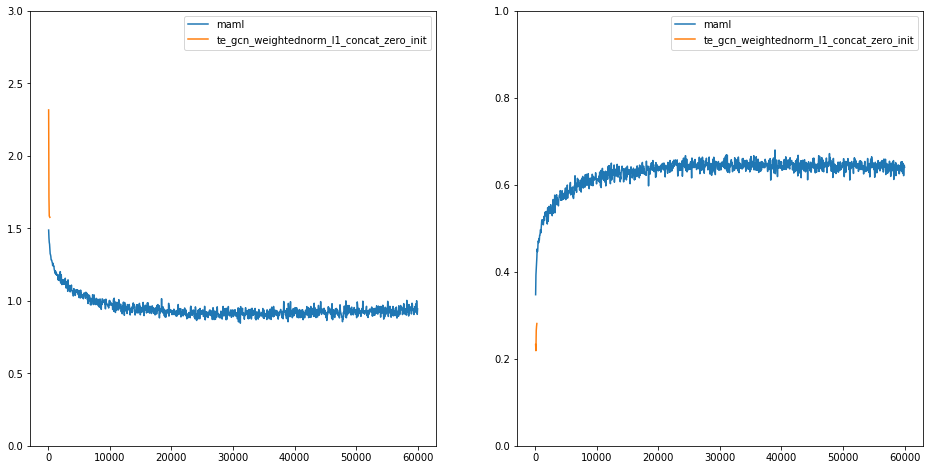

In [7]:
path = './output/'
file_list = os.listdir(path)
file_list = sorted([f for f in file_list if 'miniimagenet' in f])
print (file_list)

filename1 = './output/{}/logs/logs.csv'.format(file_list[0])
filename2 = './output/{}/logs/logs.csv'.format(file_list[-1])
plot_diff_logs(filename1, filename2)